# 결정 트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘 
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리
- 장점 : 스케일링이나 정규화 불필요 (성능에 영향 x), 쉬운 알고리즘 
- 단점 : 과대적합 --> 해결을 위한 많은 Hyper Parameter 존재
- 다른 ML 알고리즘에 비해 성능 x --> 단, 여러개의 decision tree가 모이면 성능이 강해짐 
    - 앙상블에 주로 사용됨

## [1] 모듈 로딩 및 데이터 준비



In [2]:
import pandas as pd
import numpy as npp
from sklearn.datasets import load_iris

In [3]:
# 데이터 로딩 
feature_df, target_sr = load_iris(as_frame=True, return_X_y=True) # return_X_y : 리턴 값으로 feature X와 target y가 리턴

print(f'feature_df : {feature_df.shape}, {feature_df.ndim}D')
print(f'target_sr : {target_sr.shape}, {target_sr.ndim}D')

feature_df : (150, 4), 2D
target_sr : (150,), 1D


## [2] 학습용 데이터셋 준비

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target_sr, random_state=10, stratify=target_sr)

In [6]:
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'x_test : {x_test.shape}, {x_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (112, 4), 2D
x_test : (38, 4), 2D
y_train : (112,), 1D
y_test : (38,), 1D


## [3] 학습 - 기본학습

In [7]:
# 모델 인스턴스 생성 

dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=10)

In [8]:
# 모델 파라미터 : 학습 fit() 후에 학습용 데이터셋을 기반으로 설정된 값들 

print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}개')
print(f'[dt_model.max_features_] {dt_model.max_features_}개') # 모든 feature 사용 -> 개수 반환 
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}개') # feature 이름 반환 -> 주요 feature 파악 ㅇ 
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}') # feature 중요도 

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3개
[dt_model.max_features_] 4개
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']개
[dt_model.feature_importances_] [0.03125249 0.         0.06844775 0.90029976]


## [4] 성능 체크 

In [9]:
# 학습용 데이터셋에 대한 성능 
train_score = dt_model.score(x_train, y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(x_test, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 1.0, test_score : 1.0


-> 과대적합 (데이터셋이 너무 작아서)

=> cross_validate 사용

# [5] 교차검증 

=> 데이터셋 부족 해결 및 과대적합 회피

In [10]:
# 위의 데이터는 분류

from sklearn.model_selection import StratifiedKFold, cross_validate

In [11]:
# 교차검증 준비 => 모델 인스턴스, trainDS, cv = 5(default)

# 새로운 모델 필요 -> 위에서는 Decision Tree 사용
dt_model2 = DecisionTreeClassifier(random_state=1)
cross_validate(dt_model2, x_train, y_train, return_train_score=True, return_estimator=True)

{'fit_time': array([0.        , 0.01584554, 0.        , 0.        , 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'estimator': [DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1),
  DecisionTreeClassifier(random_state=1)],
 'test_score': array([0.95652174, 0.95652174, 0.95454545, 0.86363636, 0.90909091]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [12]:
result = cross_validate(dt_model2, x_train, y_train, return_train_score=True, return_estimator=True)

In [13]:
# dict => DataFrame
result_df = pd.DataFrame(result)
result_df

,fit_time,score_time,estimator,test_score,train_score
0,0.000000,0.000000,DecisionTreeClassifier(random_state=1),0.956522,1.0
1,0.002887,0.000000,DecisionTreeClassifier(random_state=1),0.956522,1.0
2,0.000000,0.000000,DecisionTreeClassifier(random_state=1),0.954545,1.0
3,0.000000,0.000000,DecisionTreeClassifier(random_state=1),0.863636,1.0
4,0.012593,0.001205,DecisionTreeClassifier(random_state=1),0.909091,1.0


성능향상 판단 
 -> train_score보다 test_score가 낮아서 과대적합이라 판단하고 train_score와 test_score가 비슷한게 가장 좋음

## [6] 성능 향상을 위한 튜닝 => 하이퍼 파라미터 설정
- 단점 : 과대적합
    - max_depth, min_samples_leaf, ..... 
    - Decision Tree는 하이퍼 파라미터 많음

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
# 하이퍼 파라미터 dict 생성 
params = {'max_depth' : [4,3,2,1], 
          'min_samples_leaf' : [5,3,2]} # 리프 노드에 있어야 할 최소 샘플 수

In [16]:
gs_cv= GridSearchCV(DecisionTreeClassifier(), param_grid=params, refit = True, return_train_score=True)
# refit : 가장 좋은 esimator로 자동 학습 - GridSearchCV에만 존재
gs_cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [17]:
# 모델 파라미터 확인 
print(f'[gs_cv.best_params_] {gs_cv.best_params_}')
print(f'[gs_cv.best_score_] {gs_cv.best_score_}')
print(f'[gs_cv.best_estimator_] {gs_cv.best_estimator_}')
print(f'[gs_cv.cv_results_]\n {gs_cv.cv_results_}')

cv_result_df= pd.DataFrame(gs_cv.cv_results_)

[gs_cv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gs_cv.best_score_] 0.9371541501976285
[gs_cv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
[gs_cv.cv_results_]
 {'mean_fit_time': array([0.00385799, 0.00230212, 0.00025177, 0.0014153 , 0.00159931,
       0.        , 0.00314298, 0.00312519, 0.        , 0.00312285,
       0.        , 0.        ]), 'std_fit_time': array([0.00605542, 0.00250122, 0.00050354, 0.0028306 , 0.00319862,
       0.        , 0.00628595, 0.00625038, 0.        , 0.00624571,
       0.        , 0.        ]), 'mean_score_time': array([0.00133686, 0.00242872, 0.        , 0.00321589, 0.        ,
       0.        , 0.        , 0.        , 0.00312409, 0.        ,
       0.        , 0.        ]), 'std_score_time': array([0.00179643, 0.00344845, 0.        , 0.00393872, 0.        ,
       0.        , 0.        , 0.        , 0.00624819, 0.        ,
       0.        , 0.        ]), 'param_max_depth': masked_array(data=[4, 4, 4, 3, 3, 3, 2, 2

In [18]:
cv_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003858,0.006055,0.001337,0.001796,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
1,0.002302,0.002501,0.002429,0.003448,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.977528,0.966667,0.966667,0.977778,0.968739,0.008423
2,0.000252,0.000504,0.000000,0.000000,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,...,0.937154,0.022925,1,0.977528,0.977528,0.966667,0.977778,0.977778,0.975456,0.004396
3,0.001415,0.002831,0.003216,0.003939,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.944444,0.955556,0.966667,0.953109,0.008425
4,0.001599,0.003199,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.955056,0.966667,0.955556,0.977778,0.962022,0.009041
5,0.000000,0.000000,0.000000,0.000000,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.955056,0.944444,0.955556,0.977778,0.957578,0.010930
6,0.003143,0.006286,0.000000,0.000000,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
7,0.003125,0.006250,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
8,0.000000,0.000000,0.003124,0.006248,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
9,0.003123,0.006246,0.000000,0.000000,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,...,0.651779,0.016601,10,0.674157,0.674157,0.666667,0.677778,0.677778,0.674107,0.004057


In [19]:
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [20]:
cv_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003858,0.006055,0.001337,0.001796,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
1,0.002302,0.002501,0.002429,0.003448,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.977528,0.966667,0.966667,0.977778,0.968739,0.008423
2,0.000252,0.000504,0.000000,0.000000,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,...,0.937154,0.022925,1,0.977528,0.977528,0.966667,0.977778,0.977778,0.975456,0.004396
3,0.001415,0.002831,0.003216,0.003939,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.944444,0.955556,0.966667,0.953109,0.008425
4,0.001599,0.003199,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.955056,0.966667,0.955556,0.977778,0.962022,0.009041
5,0.000000,0.000000,0.000000,0.000000,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.955056,0.944444,0.955556,0.977778,0.957578,0.010930
6,0.003143,0.006286,0.000000,0.000000,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
7,0.003125,0.006250,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
8,0.000000,0.000000,0.003124,0.006248,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.943820,0.944444,0.955556,0.955556,0.950886,0.005521
9,0.003123,0.006246,0.000000,0.000000,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,...,0.651779,0.016601,10,0.674157,0.674157,0.666667,0.677778,0.677778,0.674107,0.004057


In [21]:
# 가장 좋은 모델 
best_model = gs_cv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[best_model.max_depth] : 4
[best_model.min_samples_leaf] : 2


In [22]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.01321873, 0.        , 0.07164651, 0.91513476]), 4)

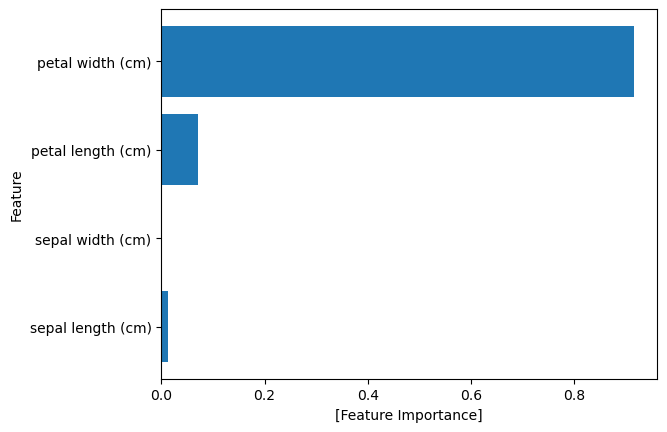

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()

## [7] DT 그래프 시각화
- Graphviz 프로그램(os에 맞는 버전) 설치 + python용 패키지 graphviz 설치
- 트리는 dot파일 형태로 저장

### [1] DT 모델을 dot 포맷의 파일로 저장 ==> export_graphviz

In [31]:
best_model.classes_, target_sr.unique(), best_model.feature_names_in_
# classes_ : 변환된 인코딩의 원본값 보유 

(array([0, 1, 2]),
 array([0, 1, 2]),
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

In [46]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='tree.dot', 
                class_names=['setosa','versicolor','verginica'], feature_names=best_model.feature_names_in_,
                impurity=True, filled=True , rounded=True)

# filled=True : 색 알록달록 , rounded=True : 테두리 둥글둥글, rotate = True : 옆으로 돌림 

### [2] dot파일 출력


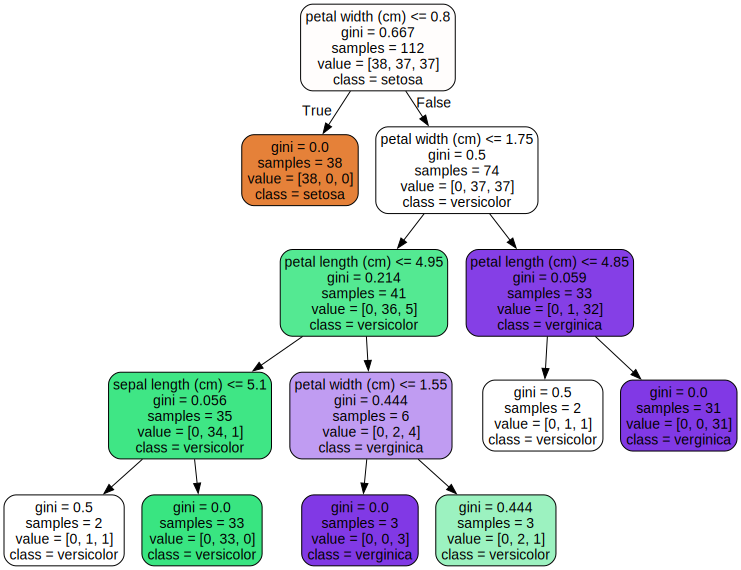

In [47]:
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_graph = f.read()

# 화면에 출력
graphviz.Source(dot_graph)

min_samples_leaf = 2로 해서 멈춤

## [8] 새로운 데이터 예측

In [53]:
feature_df[:1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [50]:
new_data =feature_df[:1]+0.21
new_data.shape

(1, 4)

In [51]:
best_model.predict(new_data)

array([0])

In [52]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])